In [1]:
import arviz as az
import os.path as op
import pandas as pd

In [2]:
bids_folder = '/data/ds-tmsrisk'

In [3]:
idata = {}

for model in ['1', '1_null', '1a', '1b', '1c', '2a', '3', '5', '5a', '6']:
    idata[model] = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model}_trace.netcdf'))

In [4]:
comparison = az.compare(idata)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/

In [5]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
1,0,-4136.520726,198.485330,0.000000,5.804054e-01,46.887667,0.000000,True,log
6,1,-4139.769095,190.239317,3.248369,2.413395e-01,46.929443,4.284802,True,log
5,2,-4145.834398,188.219486,9.313672,1.490222e-01,46.773682,5.665899,True,log
1a,3,-4173.683148,181.545956,37.162422,8.420571e-12,46.811781,7.674918,False,log
1b,4,-4186.765692,178.227287,50.244966,9.905117e-12,46.878169,9.897352,False,log
5a,5,-4194.766494,153.055812,58.245768,0.000000e+00,46.499201,11.596180,False,log
1c,6,-4215.010700,167.785782,78.489974,9.185617e-12,46.741207,12.526284,True,log
1_null,7,-4260.243990,133.538409,123.723264,9.009789e-12,46.171152,15.364150,False,log
2a,8,-4263.909485,153.687899,127.388759,2.923295e-02,45.294413,15.489010,False,log
3,9,-4790.487380,115.907298,653.966654,0.000000e+00,39.667856,32.027959,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

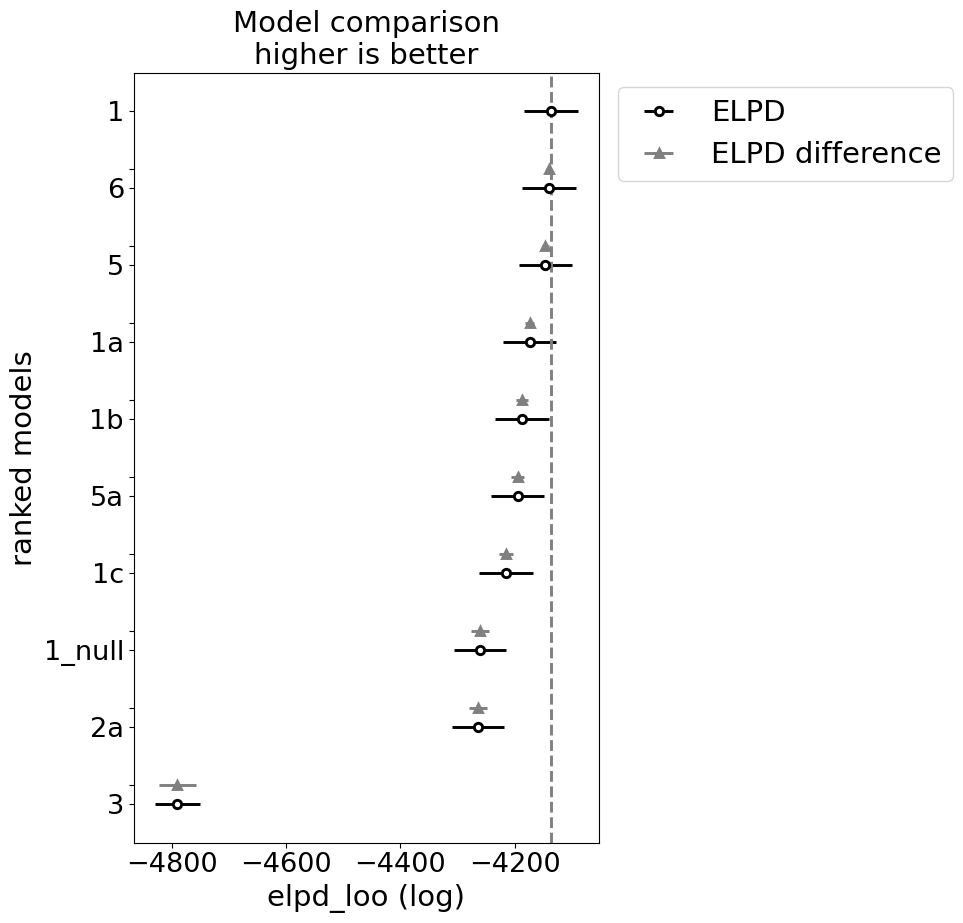

In [6]:
az.plot_compare(comparison)

In [16]:
n1 = idata['1'].posterior['n1_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n1_evidence_sd_regressors')
def get_ci(d):
    return az.hdi(d.values.ravel())

sns.catplot(data=n1.reset_index(), x='subject', y='n1_evidence_sd', kind='point', errorbar=get_ci, aspect=3., )
plt.axhline(0.0, c='k')

NameError: name 'sns' is not defined

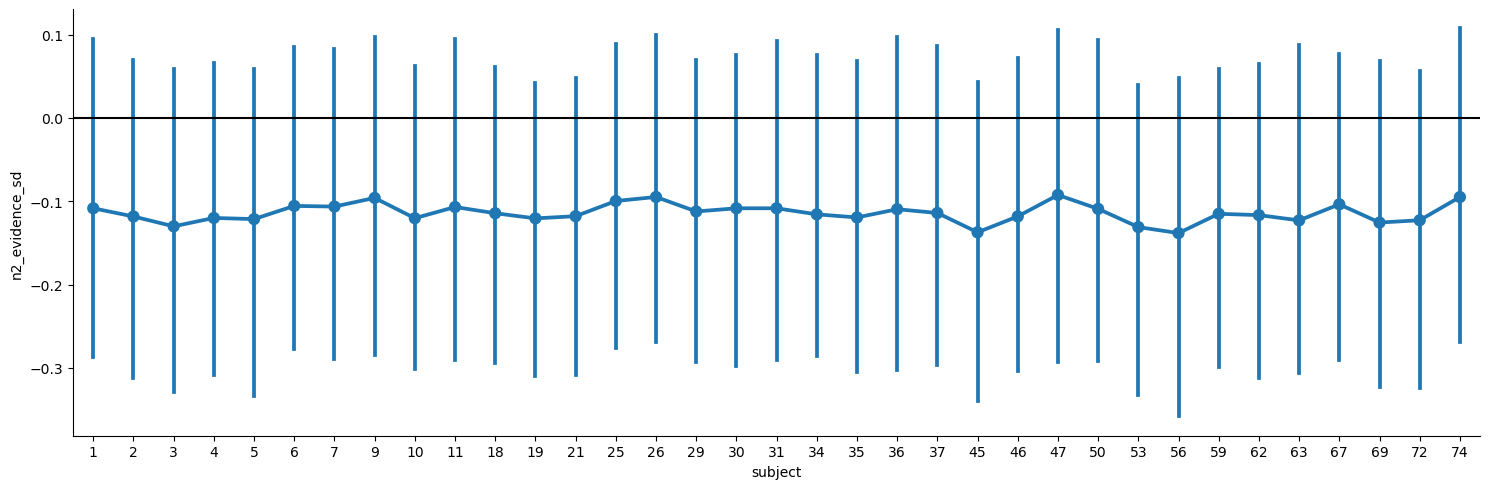

In [ ]:
n2 = idata['1'].posterior['n2_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n2_evidence_sd_regressors')
def get_ci(d):
    return az.hdi(d.values.ravel())

sns.catplot(data=n2.reset_index(), x='subject', y='n2_evidence_sd', kind='point', errorbar=get_ci, aspect=3., )
plt.axhline(0.0, c='k')

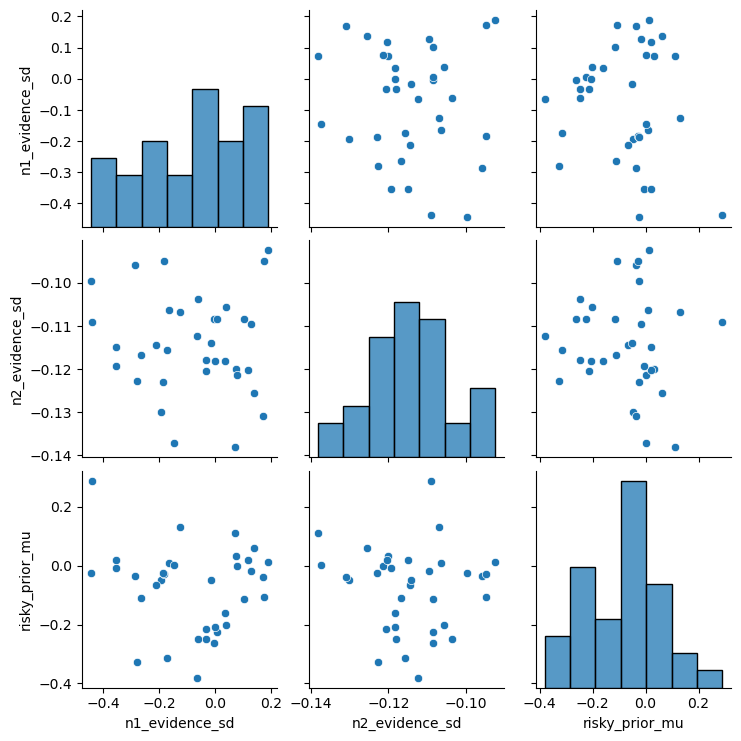

In [ ]:
n1 = idata['1'].posterior['n1_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n1_evidence_sd_regressors').groupby('subject').mean()
n2 = idata['1'].posterior['n2_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n2_evidence_sd_regressors').groupby('subject').mean()
risky_prior_mu = idata['1'].posterior['risky_prior_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'risky_prior_mu_regressors').groupby('subject').mean()

df = pd.concat((n1, n2, risky_prior_mu), axis=1)

df.corr()

import seaborn as sns
sns.pairplot(df)

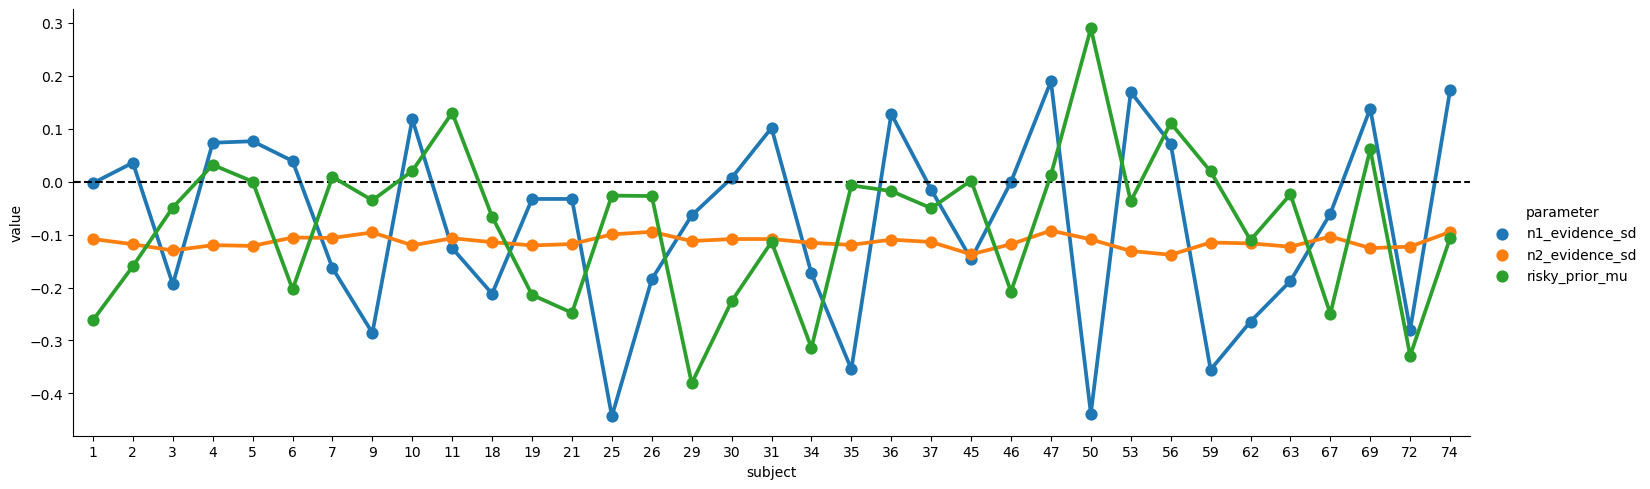

In [ ]:
import matplotlib.pyplot as plt
df.columns.name = 'parameter'
sns.catplot(df.stack().to_frame('value').reset_index(), x='subject', y='value', hue='parameter', kind='point', aspect=3.)
plt.axhline(0.0, c='k', ls='--')

,n1_evidence_sd,n2_evidence_sd,risky_prior_mu
n1_evidence_sd,1.000000,0.035574,-0.077591
n2_evidence_sd,0.035574,1.000000,-0.014566
risky_prior_mu,-0.077591,-0.014566,1.000000


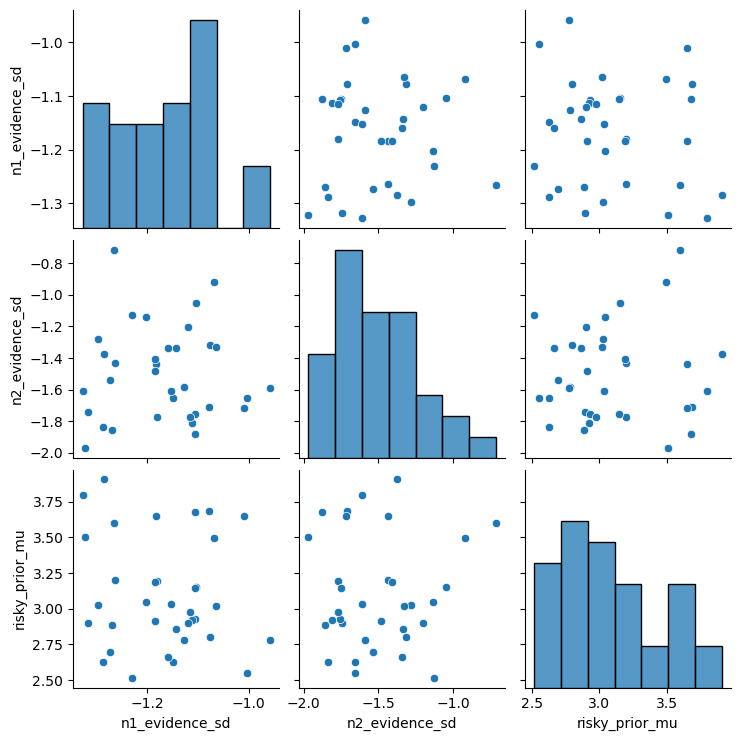

In [ ]:
n1 = idata['1'].posterior['n1_evidence_sd'].to_dataframe().xs('Intercept', 0, 'n1_evidence_sd_regressors').groupby('subject').mean()
n2 = idata['1'].posterior['n2_evidence_sd'].to_dataframe().xs('Intercept', 0, 'n2_evidence_sd_regressors').groupby('subject').mean()
risky_prior_mu = idata['1'].posterior['risky_prior_mu'].to_dataframe().xs('Intercept', 0, 'risky_prior_mu_regressors').groupby('subject').mean()

df = pd.concat((n1, n2, risky_prior_mu), axis=1)


import seaborn as sns
sns.pairplot(df)
df.corr(method='spearman')


,n1_evidence_sd,n2_evidence_sd,risky_prior_mu
n1_evidence_sd,1.000000,0.020168,-0.025490
n2_evidence_sd,0.020168,1.000000,-0.110644
risky_prior_mu,-0.025490,-0.110644,1.000000


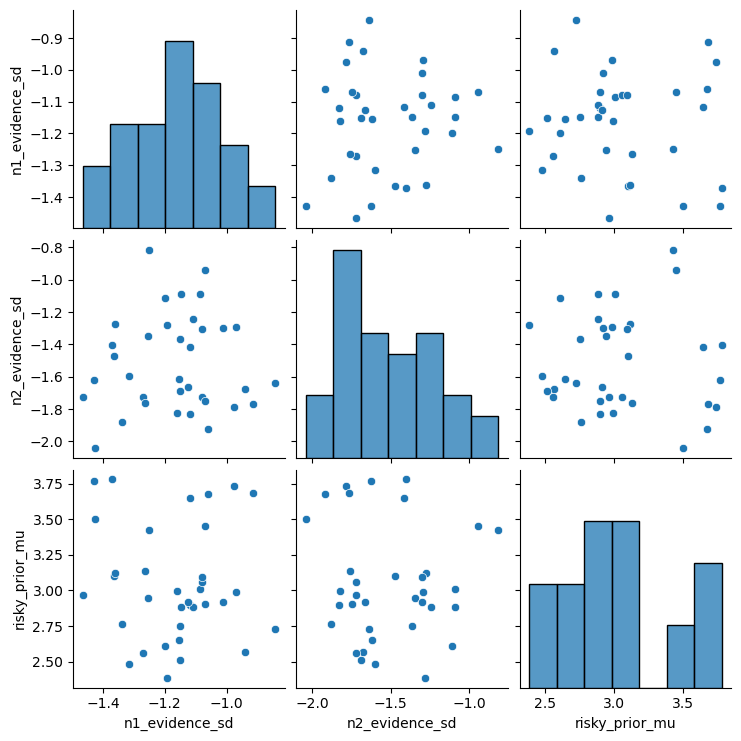

In [ ]:
n1 = idata['1_null'].posterior['n1_evidence_sd'].to_dataframe().xs('Intercept', 0, 'n1_evidence_sd_regressors').groupby('subject').mean()
n2 = idata['1_null'].posterior['n2_evidence_sd'].to_dataframe().xs('Intercept', 0, 'n2_evidence_sd_regressors').groupby('subject').mean()
risky_prior_mu = idata['1_null'].posterior['risky_prior_mu'].to_dataframe().xs('Intercept', 0, 'risky_prior_mu_regressors').groupby('subject').mean()

df = pd.concat((n1, n2, risky_prior_mu), axis=1)


import seaborn as sns
sns.pairplot(df)
df.corr(method='spearman')


In [ ]:
df.describe()

,n1_evidence_sd,n2_evidence_sd,risky_prior_mu
count,35.000000,35.000000,35.000000
mean,-1.166600,-1.514468,3.042516
std,0.154773,0.298258,0.402057
min,-1.465342,-2.040548,2.387367
25%,-1.267047,-1.737559,2.757251
50%,-1.149606,-1.617555,2.968169
75%,-1.074487,-1.299031,3.278995
max,-0.843067,-0.814325,3.779168
